# Grid world path optimization using artificial ant colony optimization (ACO)

## Importing modules

In [1]:
import os
from typing import Tuple, List

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Video

import functions as fn
import simulations as sm

## Parameters

In [2]:
# Grid parameters
GRID_SIZE: Tuple[int, int] = (10, 15)
START_POSITION: Tuple[int, int] = (6, 1)
END_POSITION: Tuple[int, int] = (4, 13)
OBSTACLES: List[Tuple[int, int]] = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14),
    (1, 0), (1, 3), (1, 14), (2, 0), (2, 3), (2, 5), (2, 6), (2, 7), (2, 11), (2, 14), (3, 0), (3, 3), (3, 10), (3, 11), (3, 13), 
    (3, 14), (4, 0), (4, 3), (4, 9), (4, 10), (4, 11), (4, 14), (5, 0), (5, 3), (5, 6), (5, 11), (5, 13), (5, 14), (6, 0), (6, 6), 
    (6, 9), (6, 11), (6, 14), (7, 0), (7, 6), (7, 9), (7, 14), (8, 0), (8, 3), (8, 6), (8, 14), (9, 0), (9, 1), (9, 2), (9, 3), 
    (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14)
]
NUM_OPTIMAL_STEPS: int = 20

# Simulation parameters
ALPHA: int = 2
BETA: int = 3
EVAPORATION_RATE: float = 0.5
DEPOSIT_FACTOR: int = 100
NUM_ANTS: int = 100
NUM_ITERATIONS: int = 1000
MAX_PATH_LENGTH: int = 33
REVISIT_POSSIBLE: bool = True
PHEROMONE_NORMALIZATION: bool = True
PHEROMONE_THRESHOLD: float = 0.25

# Visualization
WINDOW_SIZE: int = 10

# Paths
RESULTS_PATH: str = "./results"
ACO_RESULTS_PATH: str = f"{RESULTS_PATH}/ACO results"
ACO_VERSION_PATH: str = f"{ACO_RESULTS_PATH}/reentrant fields" if REVISIT_POSSIBLE else f"{ACO_RESULTS_PATH}/non-reentrant fields"
ACO_VIDEO_PATH: str = f"{ACO_VERSION_PATH}/ACO_results.mp4"

# Other
RANDOM_STATE: int = 42
LINE: str = 100*'-'
DOUBLE_LINE: str = 100*'='
SIMULATION_STARTED: str = 36*'-' + " !!! SIMULATION STARTED !!! " + 36*'-'
SIMULATION_FINISHED: str = 36*'-' + " !!! SIMULATION FINISHED !!! " + 35*'-'

## Results directories creation

In [3]:
os.makedirs(RESULTS_PATH, exist_ok=True)
os.makedirs(ACO_RESULTS_PATH, exist_ok=True)
for directory in [ACO_VERSION_PATH]:
    fn.create_or_empty_directory(directory)

## Grid world and pheromone initialization

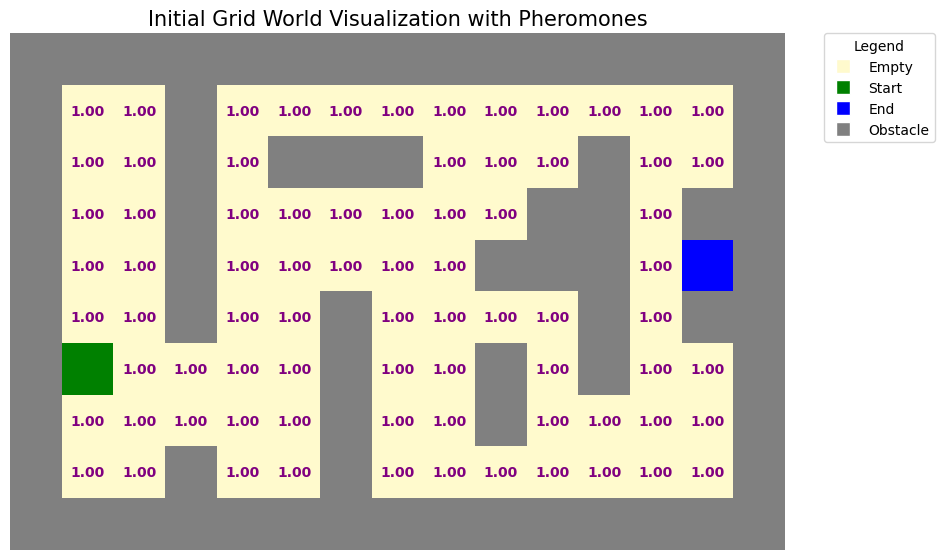

In [4]:
initial_grid_world = fn.grid_world_creation(GRID_SIZE, START_POSITION, END_POSITION, OBSTACLES)
pheromones = np.ones(GRID_SIZE)

fn.grid_world_visualization(
    grid_world=initial_grid_world, 
    title="Initial Grid World Visualization with Pheromones", 
    show_pheromones=pheromones
)

## Simulation

In [5]:
results = sm.aco_simulation(
    num_iterations=NUM_ITERATIONS,
    num_ants=NUM_ANTS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    initial_pheromones=pheromones,
    grid_world=initial_grid_world,
    alpha=ALPHA,
    beta=BETA,
    max_path_length=MAX_PATH_LENGTH,
    revisit_possible=REVISIT_POSSIBLE,
    evaporation_rate=EVAPORATION_RATE,
    deposit_factor=DEPOSIT_FACTOR,
    pheromone_normalization=PHEROMONE_NORMALIZATION,
    random_seed=RANDOM_STATE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    pheromone_threshold=PHEROMONE_THRESHOLD,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE   
)

best_paths = results[6]
best_scores = results[7]
median_scores = results[8]
mean_scores = results[9]
iteration = results[10]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. iteration finished - best score: 4.4721 - median score: 9.8424 - mean score: 9.5877
----------------------------------------------------------------------------------------------------
 2. iteration finished - best score: 0.0 - median score: 9.4868 - mean score: 9.6235
----------------------------------------------------------------------------------------------------
 3. iteration finished - best score: 0.0 - median score: 0.0 - mean score: 1.5847
----------------------------------------------------------------------------------------------------
 4. iteration finished - best score: 0.0 - median score: 4.4721 - mean score: 2.3732
----------------------------------------------------------------------------------------------------
First full path iteration: 2
First optimal path iteration: 3
Convergence achieved in iteration: 4
Total Time: 0.73 seconds
Time per Iteration: 0.1800 secon

## Visualization the final grid world with pheromone levels

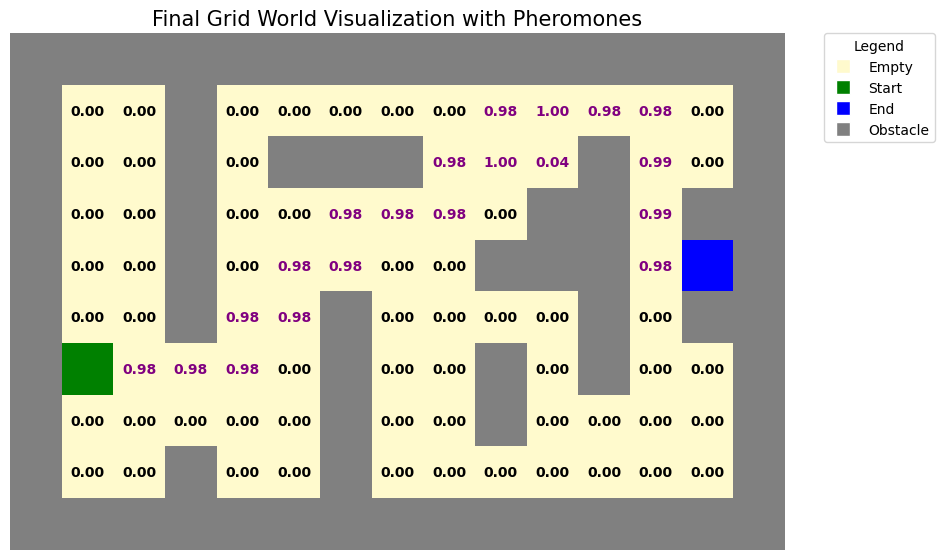

In [6]:
fn.grid_world_visualization(
    grid_world=initial_grid_world, 
    title="Final Grid World Visualization with Pheromones", 
    show_pheromones=pheromones
)

## Result scores visualization

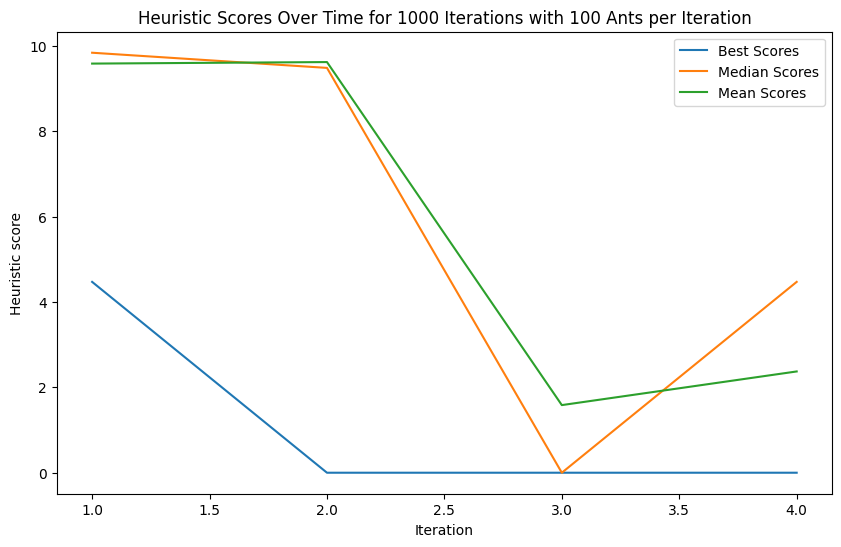

In [7]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title(f"Heuristic Scores Over Time for {NUM_ITERATIONS} Iterations with {NUM_ANTS} Ants per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Heuristic score")
plt.legend()

plt.show()

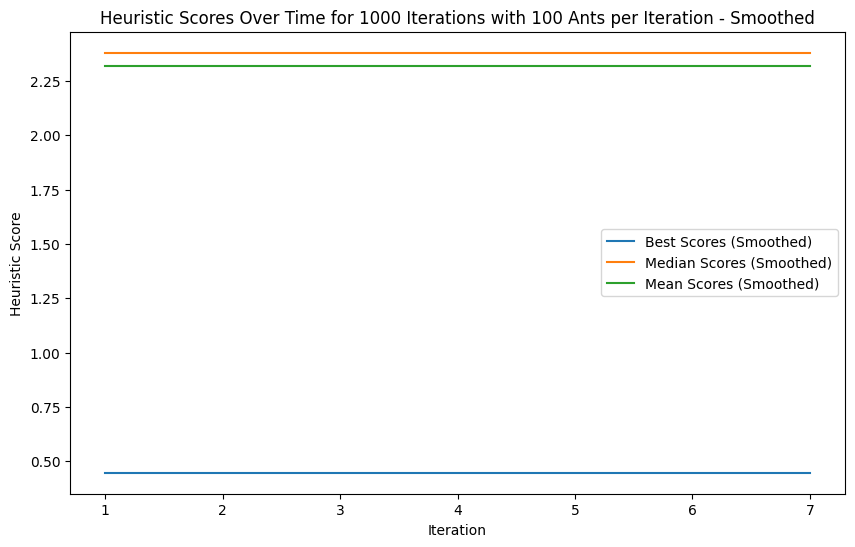

In [8]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title(f"Heuristic Scores Over Time for {NUM_ITERATIONS} Iterations with {NUM_ANTS} Ants per Iteration - Smoothed")
plt.xlabel("Iteration")
plt.ylabel("Heuristic Score")
plt.legend()

plt.show()


In [9]:
paths_progression_indices = fn.get_indices(iteration-1)

print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=ACO_VERSION_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    indices_list=paths_progression_indices,  
    title_type="iteration", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(ACO_VERSION_PATH, ACO_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 4/4 [00:54<00:00, 13.72s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/ACO results/reentrant fields/ACO_results.mp4
Video creation finished!


frame=  100 fps= 88 q=-1.0 Lsize=     142kB time=00:00:19.40 bitrate=  59.8kbits/s speed=17.1x    
video:140kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.311608%
[libx264 @ 0x55cbbab2c740] frame I:1     Avg QP: 9.66  size: 23581
[libx264 @ 0x55cbbab2c740] frame P:66    Avg QP:16.18  size:  1581
[libx264 @ 0x55cbbab2c740] frame B:33    Avg QP:11.96  size:   441
[libx264 @ 0x55cbbab2c740] consecutive B-frames: 38.0% 50.0% 12.0%  0.0%
[libx264 @ 0x55cbbab2c740] mb I  I16..4: 80.9%  5.9% 13.2%
[libx264 @ 0x55cbbab2c740] mb P  I16..4:  1.8%  0.4%  0.7%  P16..4:  1.4%  0.2%  0.1%  0.0%  0.0%    skip:95.6%
[libx264 @ 0x55cbbab2c740] mb B  I16..4:  0.8%  0.1%  0.2%  B16..8:  1.6%  0.1%  0.0%  direct: 0.0%  skip:97.0%  L0:50.0% L1:49.2% BI: 0.8%
[libx264 @ 0x55cbbab2c740] 8x8 transform intra:10.8% inter:61.1%
[libx264 @ 0x55cbbab2c740] coded y,uvDC,uvAC intra: 12.1% 28.8% 24.0% inter: 0.4% 0.7% 0.5%
[libx264 @ 0x55cbbab2c740] i16 v,h,dc,p: 73% 26%  1%  0%
[li

In [10]:
Video(ACO_VIDEO_PATH, embed=True)